In [1]:
import os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle
import mplhep as hep
import warnings
import scipy
from plot_utils import *

warnings.filterwarnings('ignore')
plt.style.use(hep.style.CMS)
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'

In [4]:
# input .pkl files
plotDir = '/work/submit/{}/SUEP/outputs/'.format(os.environ['USER'])
infile_names = glob.glob(plotDir+'*.pkl')

offline_files_2018 = [f for f in infile_names if "sys_studies_v4.pkl" in f and ('20UL18' in f)]
plots_2018 = loader(offline_files_2018, apply_lumis=True, exclude_low_bins=True)
# offline_files_data2018 = [f for f in infile_names if "sys_studies_v4.pkl" in f and ('Run2018' in f)]
# plots_data2018 = loader(offline_files_data2018, apply_lumis=False, exclude_low_bins=False)

# put everything in one dictionary
plots = {}

# for key in plots_data2018.keys(): plots[key+"_2018"] = plots_data2018[key]
for key in plots_2018.keys(): plots[key+"_2018"] = plots_2018[key]

Scaling factor alpha: 2.26818218881235
Sigma alpha: 0.0385054555960370


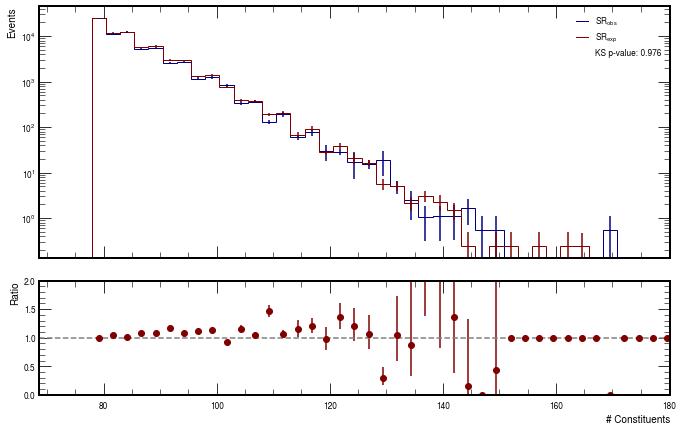

In [5]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
abcd = plots['QCD_HT_2018'][plot_label]

xregions = [0.35j, 0.4j, 0.5j, 1.0j]
yregions = [10j, 40j, 80j, 300j]

SR, SR_exp, alpha, sigma_alpha = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x')

print("Scaling factor alpha:", alpha)
print("Sigma alpha:", sigma_alpha)

nonzero = (SR.values() > 0) | (SR_exp.values() > 0) # don't consider empty bins for KS test
ks = scipy.stats.ks_2samp(SR.values()[nonzero], SR_exp.values()[nonzero])

fig, axs = plot_ratio([SR_exp, SR], labels=["$SR_{obs}$", "$SR_{exp}$"])
_ = axs[0].plot([],[],' ',label='KS p-value: {}'.format(round(ks.pvalue,3)))
_ = axs[1].set_ylim(0,2)
_ = axs[0].legend()